In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [148]:
pd.read_csv('renta_media_CCAA.csv', encoding='latin-1', sep=';')

,Comunidades y Ciudades Autónomas,Renta anual neta media por hogar,Periodo,Total
0,Total Nacional,Renta neta media por hogar,2021,30.552
1,Total Nacional,Renta neta media por hogar,2020,30.690
2,Total Nacional,Renta neta media por hogar,2019,29.132
3,Total Nacional,Renta neta media por hogar,2018,28.417
4,Total Nacional,Renta neta media por hogar,2017,27.558
...,...,...,...,...
95,19 Melilla,Renta neta media por hogar,2021,36.038
96,19 Melilla,Renta neta media por hogar,2020,37.138
97,19 Melilla,Renta neta media por hogar,2019,37.552
98,19 Melilla,Renta neta media por hogar,2018,41.714


In [149]:
panel21_kg = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel21_kg.csv')
panel20_kg = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel20_kg.csv')
panel19_kg = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel19_kg.csv')

In [179]:
panel21_España = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel21_España.csv')
panel20_España = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel20_España.csv')
panel19_España = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel19_España.csv')

In [180]:
panel21_España

,ventas(miles €),ESPAÑA
0,.TOTAL ALIMENTACION,7.454360e+07
1,TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG,1.432728e+05


In [181]:
panel20_España

,ventas(miles €),T.ESPAÑA
0,.TOTAL ALIMENTACION,7.934825e+07
1,TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG,1.160943e+05


In [182]:
panel19_España

,ventas(miles €),ESPAÑA
0,.TOTAL ALIMENTACION,6.950313e+07
1,TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG,6.897601e+04


In [185]:
España1920 = pd.merge(panel19_España, panel20_España, on='ventas(miles €)', how='inner')
España = pd.merge(España1920, panel21_España, on='ventas(miles €)', how='inner')
España.columns = ['ventas(miles €)', '2019', '2020', '2021']
España = pd.DataFrame (España)
España


,ventas(miles €),2019,2020,2021
0,.TOTAL ALIMENTACION,6.950313e+07,7.934825e+07,7.454360e+07
1,TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG,6.897601e+04,1.160943e+05,1.432728e+05


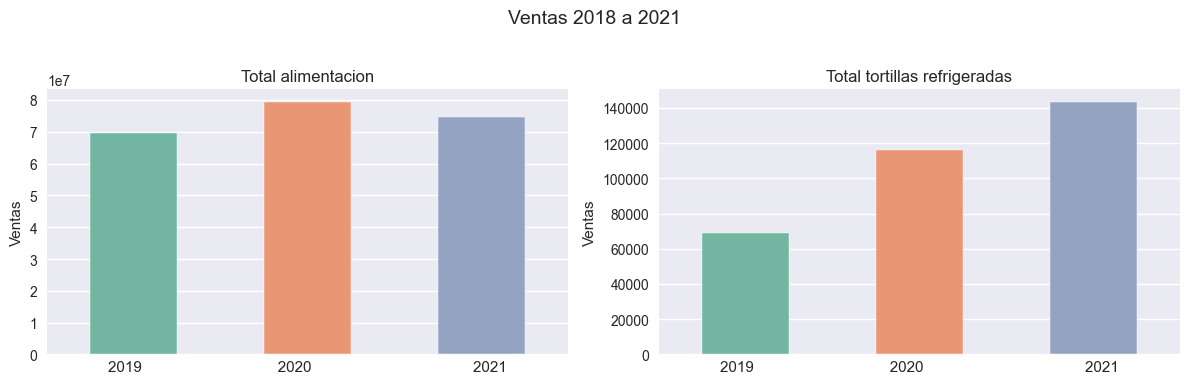

In [186]:
# Convertir el DataFrame a formato largo
espania_melted = pd.melt(España, id_vars=['ventas(miles €)'], value_vars=['2019', '2020', '2021'], var_name='Año', value_name='Ventas')
Año = '2019', '2020', '2021'
# Crear los subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# Plot1
sns.set_style('whitegrid')
sns.barplot(ax=axs[0], x='Año', y='Ventas', data=espania_melted[espania_melted['ventas(miles €)'] == '.TOTAL ALIMENTACION'], palette='Set2', width=0.5)
axs[0].set_title('Total alimentacion')
axs[0].set_xlabel('2019                                2020                                      2021')
axs[0].set_xticks([])


# Plot2
sns.set_style('whitegrid')
sns.barplot(ax=axs[1], x='Año', y='Ventas', data=espania_melted[espania_melted['ventas(miles €)'] == 'TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG'], palette='Set2',width=0.5)
axs[1].set_title('Total tortillas refrigeradas')
axs[1].set_xlabel('2019                                2020                                      2021')
axs[1].set_xticks([])

# Titulos 
plt.suptitle('Ventas 2018 a 2021', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

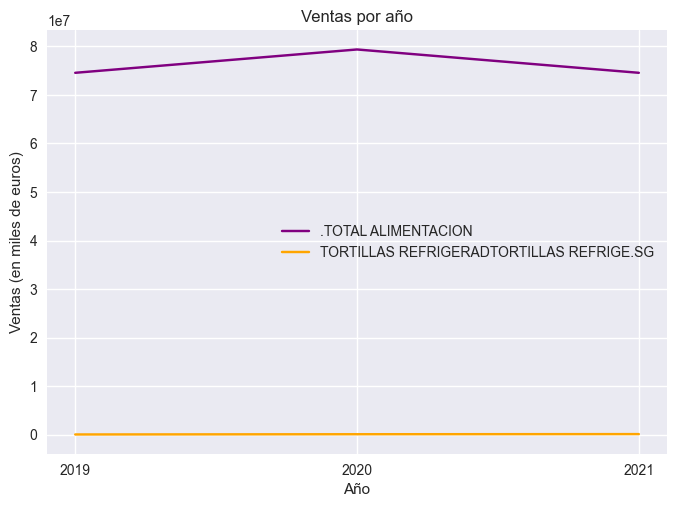

In [156]:
# Configurar el estilo de la gráfica
plt.style.use('seaborn')

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de líneas para .TOTAL ALIMENTACION
ax.plot(España.columns[1:], df.loc[0][1:], label='.TOTAL ALIMENTACION', color='purple')

# Crear la gráfica de líneas para TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG
ax.plot(España.columns[1:], España.loc[1][1:], label='TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG', color='orange')

# Agregar leyenda
ax.legend()

# Configurar el título y los ejes
ax.set_title('Ventas por año')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas (en miles de euros)')

# Mostrar la gráfica
plt.show()


In [157]:
panel21_CCAA = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel21_CCAA.csv')

In [158]:
panel21_kg

,ventas(miles €),ESPAÑA,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,.TOTAL ALIMENTACION,7.454360e+07,1.320175e+07,2.224317e+06,1.960488e+06,7.717933e+06,2.223493e+06,1.221275e+07,9.982845e+06,3.032512e+06,1.504874e+06,4.008167e+06,4.577162e+06,1.883026e+06,892214.603834,4.150941e+06,488640.463368,1.064580e+06,3.417914e+06
1,T.HUEVOS KGS,9.861295e+05,1.639197e+05,3.036903e+04,2.298965e+04,1.018576e+05,2.744403e+04,1.650070e+05,1.290014e+05,3.817307e+04,1.807374e+04,4.957791e+04,7.090107e+04,2.481321e+04,13300.359453,6.018436e+04,6246.450495,1.506794e+04,4.920303e+04
2,T.HUEVOS UNDS.,9.861295e+05,1.639197e+05,3.036903e+04,2.298965e+04,1.018576e+05,2.744403e+04,1.650070e+05,1.290014e+05,3.817307e+04,1.807374e+04,4.957791e+04,7.090107e+04,2.481321e+04,13300.359453,6.018436e+04,6246.450495,1.506794e+04,4.920303e+04
3,TOTAL HUEVOS GALLINA,9.728149e+05,1.617447e+05,2.958079e+04,2.248252e+04,1.004759e+05,2.708351e+04,1.622625e+05,1.276378e+05,3.772926e+04,1.784634e+04,4.870107e+04,7.028891e+04,2.474811e+04,13218.103000,5.892545e+04,6158.339500,1.492888e+04,4.900276e+04
4,OTRAS AVES,1.331459e+04,2.175023e+03,7.882403e+02,5.071237e+02,1.381782e+03,3.605152e+02,2.744441e+03,1.363547e+03,4.438068e+02,2.274018e+02,8.768348e+02,6.121552e+02,6.510597e+01,82.256453,1.258918e+03,88.110995,1.390559e+02,2.002651e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,BEBIDAS REFRESCAN.SG,9.164636e+04,9.069116e+03,1.300668e+03,2.713598e+03,8.505350e+03,3.342454e+03,2.860564e+04,1.077867e+04,5.687610e+03,3.111260e+03,3.656060e+03,3.096026e+03,1.701523e+03,528.465990,1.771213e+03,574.869540,2.505109e+02,6.953327e+03
677,HARINAS Y SEMOLAS SG,2.837211e+04,4.948462e+03,6.996445e+02,1.301831e+03,2.698470e+03,7.500378e+02,3.667858e+03,3.922026e+03,1.013646e+03,3.642877e+02,1.183835e+03,1.732564e+03,1.050088e+03,281.552125,9.718398e+02,185.405280,3.140422e+02,3.286523e+03
678,RESTO PRODUCTOS SG,3.269743e+05,5.687004e+04,9.233700e+03,7.661439e+03,4.255605e+04,8.576016e+03,4.913326e+04,4.607009e+04,1.366735e+04,5.610773e+03,1.634475e+04,2.067274e+04,7.316170e+03,3635.820400,1.622390e+04,1361.683600,4.396371e+03,1.764420e+04
679,ALIMENTACION FRESCA,3.149787e+07,5.543459e+06,9.989581e+05,7.710707e+05,3.201460e+06,9.440017e+05,4.885870e+06,4.152916e+06,1.296009e+06,5.938309e+05,1.881476e+06,2.098138e+06,8.161133e+05,374168.598008,1.941753e+06,223170.805160,5.220908e+05,1.253386e+06


In [159]:
#importo los datos para trabajar
panel21_CCAA = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel21_CCAA.csv')
panel20_CCAA = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel20_CCAA.csv')
panel19_CCAA = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos consumo/panel19_CCAA.csv')

In [193]:
#describo las coluimnas para uniofiar los tres archivos e incluyo el año
panel21_CCAA.columns = ['Año', 'CATALUÑA', 'ARAGÓN', 'ILLES BALEARS',
       'COMUNITAT VALENCIANA', 'REGIÓN DE MURCIA', 'ANDALUCÍA',
       'COMUNIDAD DE MADRID', 'CASTILLA - LA MANCHA', 'EXTREMADURA',
       'CASTILLA Y LEÓN', 'GALICIA', 'PRINCIPADO DE ASTURIAS', 'CANTABRIA',
       'PAIS VASCO', 'LA RIOJA', 'C. FORAL DE NAVARRA', 'CANARIAS']
panel21_CCAA.replace({"TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG": "2021"}, inplace=True)
panel21_CCAA

,Año,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,2021,24785.3368,5897.3986,3089.12619,11334.5155,3376.63014,28513.9313,23640.2594,6014.007,3541.3682,8776.0117,3659.49205,2569.46837,1700.3784,8525.8415,1078.99886,1764.70445,5005.2866


In [194]:
panel20_CCAA.columns = ['Año', 'CATALUÑA', 'ARAGÓN', 'ILLES BALEARS',
       'COMUNITAT VALENCIANA', 'REGIÓN DE MURCIA', 'ANDALUCÍA',
       'COMUNIDAD DE MADRID', 'CASTILLA - LA MANCHA', 'EXTREMADURA',
       'CASTILLA Y LEÓN', 'GALICIA', 'PRINCIPADO DE ASTURIAS', 'CANTABRIA',
       'PAIS VASCO', 'LA RIOJA', 'C. FORAL DE NAVARRA', 'CANARIAS']
panel20_CCAA.replace({"TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG": "2020"}, inplace=True)
panel20_CCAA

,Año,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,2020,20617.8176,4796.4761,2699.8065,9282.4089,3524.32453,22637.3333,19836.0152,4956.5692,2312.3992,6949.3323,3055.74758,1951.70045,1177.19265,4993.3937,933.357585,1846.2318,4524.22295


In [195]:
panel19_CCAA.columns = ['Año', 'CATALUÑA', 'ARAGÓN', 'ILLES BALEARS',
       'COMUNITAT VALENCIANA', 'REGIÓN DE MURCIA', 'ANDALUCÍA',
       'COMUNIDAD DE MADRID', 'CASTILLA - LA MANCHA', 'EXTREMADURA',
       'CASTILLA Y LEÓN', 'GALICIA', 'PRINCIPADO DE ASTURIAS', 'CANTABRIA',
       'PAIS VASCO', 'LA RIOJA', 'C. FORAL DE NAVARRA', 'CANARIAS']
panel19_CCAA.replace({"TORTILLAS REFRIGERADTORTILLAS REFRIGE.SG": "2019"}, inplace=True)

panel19_CCAA

,Año,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,2019,12754.8249,2680.0658,1571.36175,5392.3392,1746.36114,15240.337,12239.1256,2345.6232,1330.49318,3307.7258,1188.74653,1075.81386,915.28142,2259.9413,430.48536,1294.34621,3203.1428


In [196]:
# Union de los datos del 19 y 20 con append (igualo columnas)
panel19_CCAA.columns = panel20_CCAA.columns
CCAA19_20 = panel19_CCAA.append(panel20_CCAA, ignore_index=True)
CCAA19_20 

,Año,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,2019,12754.8249,2680.0658,1571.36175,5392.3392,1746.36114,15240.3370,12239.1256,2345.6232,1330.49318,3307.7258,1188.74653,1075.81386,915.28142,2259.9413,430.485360,1294.34621,3203.14280
1,2020,20617.8176,4796.4761,2699.80650,9282.4089,3524.32453,22637.3333,19836.0152,4956.5692,2312.39920,6949.3323,3055.74758,1951.70045,1177.19265,4993.3937,933.357585,1846.23180,4524.22295


In [200]:
# Union de los datos del 19+20 con el 21 usando append (igualo columnas)
CCAA19_20.columns = panel21_CCAA.columns

CCAA = CCAA19_20.append(panel21_CCAA, ignore_index=True)
CCAA = pd.DataFrame (CCAA)
CCAA


,Año,CATALUÑA,ARAGÓN,ILLES BALEARS,COMUNITAT VALENCIANA,REGIÓN DE MURCIA,ANDALUCÍA,COMUNIDAD DE MADRID,CASTILLA - LA MANCHA,EXTREMADURA,CASTILLA Y LEÓN,GALICIA,PRINCIPADO DE ASTURIAS,CANTABRIA,PAIS VASCO,LA RIOJA,C. FORAL DE NAVARRA,CANARIAS
0,2019,12754.8249,2680.0658,1571.36175,5392.3392,1746.36114,15240.3370,12239.1256,2345.6232,1330.49318,3307.7258,1188.74653,1075.81386,915.28142,2259.9413,430.485360,1294.34621,3203.14280
1,2020,20617.8176,4796.4761,2699.80650,9282.4089,3524.32453,22637.3333,19836.0152,4956.5692,2312.39920,6949.3323,3055.74758,1951.70045,1177.19265,4993.3937,933.357585,1846.23180,4524.22295
2,2021,24785.3368,5897.3986,3089.12619,11334.5155,3376.63014,28513.9313,23640.2594,6014.0070,3541.36820,8776.0117,3659.49205,2569.46837,1700.37840,8525.8415,1078.998860,1764.70445,5005.28660


In [238]:
# Datos de las comunidades autónomas
comunidades = ["CATALUÑA", "ARAGÓN", "ILLES BALEARS", "COMUNITAT VALENCIANA",
               "REGIÓN DE MURCIA", "ANDALUCÍA", "COMUNIDAD DE MADRID",
               "CASTILLA - LA MANCHA", "EXTREMADURA", "CASTILLA Y LEÓN",
               "GALICIA", "PRINCIPADO DE ASTURIAS", "CANTABRIA", "PAIS VASCO",
               "LA RIOJA", "C. FORAL DE NAVARRA", "CANARIAS"]

# Datos de longitud
longitud = [-4.57619759928521, -0.665188363252903, -5.99327675127265, 2.90480293180095, -15.6703443955745, -4.03212552496074, -4.78484344919995, -3.00638893532113, 1.5243542306751, -0.557814181118517, -6.15132249142922, -7.91087207569347, -3.71679674194616, -1.48537547094598, -1.64778049397349, -2.61690349909685, -2.5164092074648]

# Datos de latitud
latitud = [37.4681178570892, 41.5139247146545, 43.2937220828477, 39.5736869066881, 28.3501719765776, 43.1971511768274, 41.7521468123472, 39.577577660364, 41.797427299488, 39.3950044279987, 39.1877394661092, 42.7547472692852, 40.494566396543, 38.0012558520825, 42.6666457550456, 43.0432512002306, 42.2752992031491]
         
# Datos de ventas por año
ventas_2019 = [12754.8249, 2680.0658, 1571.36175, 5392.3392, 1746.36114,
              15240.3370, 12239.1256, 2345.6232, 1330.49318, 3307.7258, 1188.74653,
              1075.81386, 915.28142, 2259.9413, 430.485360, 1294.34621, 3203.14280]

ventas_2020 = [20617.8176, 4796.4761, 2699.80650, 9282.4089, 3524.32453,
              22637.3333, 19836.0152, 4956.5692, 2312.39920, 6949.3323, 3055.74758,
              1951.70045, 1177.19265, 4993.3937, 933.357585, 1846.23180, 4524.22295]

ventas_2021 = [24785.3368, 5897.3986, 3089.12619, 11334.5155, 3376.63014,
              28513.9313, 23640.2594, 6014.0070, 3541.36820, 8776.0117, 3659.49205,
              2569.46837, 1700.37840, 8525.8415, 1078.998860, 1764.70445, 5005.28660]

# Crear el dataframe
mapaVentas = pd.DataFrame({'Comunidades': comunidades,'Longitud': longitud, 'Latitud': latitud, 'Ventas 2019': ventas_2019, 'Ventas 2020': ventas_2020, 'Ventas 2021': ventas_2021})

mapaVentas

,Comunidades,Longitud,Latitud,Ventas 2019,Ventas 2020,Ventas 2021
0,CATALUÑA,-4.576198,37.468118,12754.82490,20617.817600,24785.33680
1,ARAGÓN,-0.665188,41.513925,2680.06580,4796.476100,5897.39860
2,ILLES BALEARS,-5.993277,43.293722,1571.36175,2699.806500,3089.12619
3,COMUNITAT VALENCIANA,2.904803,39.573687,5392.33920,9282.408900,11334.51550
4,REGIÓN DE MURCIA,-15.670344,28.350172,1746.36114,3524.324530,3376.63014
5,ANDALUCÍA,-4.032126,43.197151,15240.33700,22637.333300,28513.93130
6,COMUNIDAD DE MADRID,-4.784843,41.752147,12239.12560,19836.015200,23640.25940
7,CASTILLA - LA MANCHA,-3.006389,39.577578,2345.62320,4956.569200,6014.00700
8,EXTREMADURA,1.524354,41.797427,1330.49318,2312.399200,3541.36820
9,CASTILLA Y LEÓN,-0.557814,39.395004,3307.72580,6949.332300,8776.01170


In [283]:
# Datos con latitud/longitud y valores
ventas21_fig = px.scatter_mapbox(mapaVentas, lat = 'Latitud', lon = 'Longitud', size = 'Ventas 2021',
                        color = 'Ventas 2021',
                        text = 'Comunidades',
                        zoom = 4.4, 
                        mapbox_style = 'carto-positron')
               
ventas21_fig.show() 

# VENTAS 2020--Datos con latitud/longitud y valores
ventas20_fig = px.scatter_mapbox(mapaVentas, lat = 'Latitud', lon = 'Longitud', size = 'Ventas 2020',
                        color = 'Ventas 2020',
                        text = 'Comunidades',
                        zoom = 4.4, 
                        mapbox_style = 'carto-positron')
               
ventas20_fig.show() 

# Datos con latitud/longitud y valores
ventas19_fig = px.scatter_mapbox(mapaVentas, lat = 'Latitud', lon = 'Longitud', size = 'Ventas 2019',
                        color = 'Ventas 2019',
                        text = 'Comunidades',
                        zoom = 4.4, 
                        mapbox_style = 'carto-positron')
               
ventas19_fig.show() 

In [272]:
fig = px.scatter_geo(mapaVentas, lat = 'Latitud', lon = 'Longitud', size = 'Ventas 2021',
                     scope = 'europe', center = {'lon': -3.72, 'lat': 40})
fig.update_layout(autosize = True, geo = dict(projection_scale = 6))

fig.show()

In [229]:
import pandas as pd

lati = pd.read_csv('/Users/Ade/OneDrive/Escritorio/EDA/datos/Prov_ncies_d_Espanya.csv', sep=",")
lati

,"""id"",""name"",""longitude"",""latitude"",""tot_pop"""
0,"""01"",""Andaluc?a"",-4.57619759928521,37.46811785..."
1,"""02"",""Arag?n"",-0.665188363252903,41.5139247146545"
2,"""03"",""Principado de Asturias"",-5.9932767512726..."
3,"""04"",""Islas Baleares"",2.90480293180095,39.5736..."
4,"""05"",""Islas Canarias"",-15.6703443955745,28.350..."
5,"""06"",""Cantabria"",-4.03212552496074,43.19715117..."
6,"""07"",""Castilla y Le?n"",-4.78484344919995,41.75..."
7,"""08"",""Castilla-La Mancha"",-3.00638893532113,39..."
8,"""09"",""Catalu?a"",1.5243542306751,41.797427299488"
9,"""10"",""Comunidad Valenciana"",-0.557814181118517..."
